In [2]:
pip install numpy librosa scikit-learn matplotlib seaborn soundfile


   ---------------------------------------- 0.0/260.7 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/260.7 kB ? eta -:--:--
   ------ -------------------------------- 41.0/260.7 kB 495.5 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/260.7 kB 657.6 kB/s eta 0:00:01
   ---------------- --------------------- 112.6/260.7 kB 656.4 kB/s eta 0:00:01
   -------------------- ----------------- 143.4/260.7 kB 655.8 kB/s eta 0:00:01
   ----------------------- -------------- 163.8/260.7 kB 656.4 kB/s eta 0:00:01
   ---------------------------- --------- 194.6/260.7 kB 655.9 kB/s eta 0:00:01
   ----------------------------------- -- 245.8/260.7 kB 656.0 kB/s eta 0:00:01
   -------------------------------------  256.0/260.7 kB 630.2 kB/s eta 0:00:01
   -------------------------------------- 260.7/260.7 kB 593.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.0 MB 640.0 kB/s e

## Goal of the Project
### To build a simple Speech Emotion Detection system that:

### Extracts audio features (MFCC) from .wav files

### Trains a Machine Learning model (Logistic Regression)

### Predicts emotion from new audio

### Visualizes waveform, MFCC, confusion matrix, and class distribution

## Step 1: Import Required Libraries

In [22]:
import os
import glob
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Step 2: Define Emotion Map

In [23]:
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry"
}


## Step 3: Visualize Audio (Waveform + MFCC)

In [21]:
def visualize_audio(file_path):
    y, sr = librosa.load(file_path)
    
    plt.figure(figsize=(14, 6))

    # Waveform
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title("Waveform")

    # MFCC
    plt.subplot(1, 2, 2)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title("MFCC")

    plt.suptitle(f"Visualization of {os.path.basename(file_path)}", fontsize=14)
    plt.tight_layout()
    plt.show()


## Step 4: Extract Features from Audio

In [24]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=3, offset=0.5)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)


## Step 5: Load Dataset

In [25]:
def load_data(data_path):
    X, y = [], []
    for file in os.listdir(data_path):
        if file.endswith(".wav"):
            emotion_code = file.split("-")[2]
            emotion = emotion_map.get(emotion_code)
            if emotion:
                features = extract_features(os.path.join(data_path, file))
                X.append(features)
                y.append(emotion)
    return np.array(X), np.array(y)


## Step 6: Set Data Path and Load Data

In [26]:
data_path = r"C:\Users\sojap\Downloads\archive (9)\audio_speech_actors_01-24\Actor_24"
X, y = load_data(data_path)


## Step 7: Split Dataset for Training

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)


## Step 8: Train the Model

In [28]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



C:\Users\sojap\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

## Step 9: Evaluate Model Performance


In [32]:
y_pred = model.predict(X_test)

print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))
print(f" Accuracy: {accuracy_score(y_test, y_pred):.2f}")



 Classification Report:

              precision    recall  f1-score   support

       angry       1.00      1.00      1.00         2
        calm       0.50      1.00      0.67         2
       happy       1.00      0.50      0.67         2
     neutral       1.00      1.00      1.00         1
         sad       0.00      0.00      0.00         2

    accuracy                           0.67         9
   macro avg       0.70      0.70      0.67         9
weighted avg       0.67      0.67      0.63         9

 Accuracy: 0.67


## Step 10: Plot Confusion Matrix

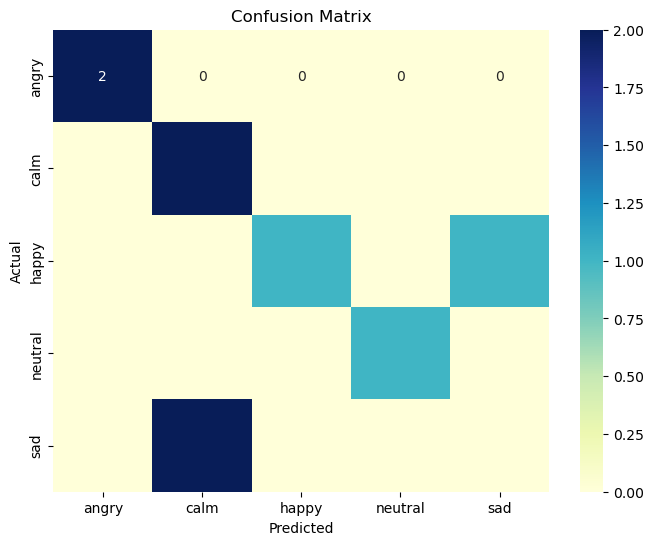

In [33]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Step 11: Show Class Distribution

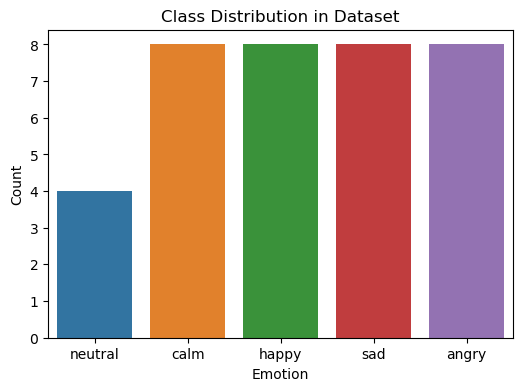

In [34]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Class Distribution in Dataset")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()


## step 12: Automatically Select a File and Predict


 Testing on file: C:\Users\sojap\Downloads\archive (9)\audio_speech_actors_01-24\Actor_24\03-01-01-01-01-01-24.wav
 Predicted Emotion: neutral


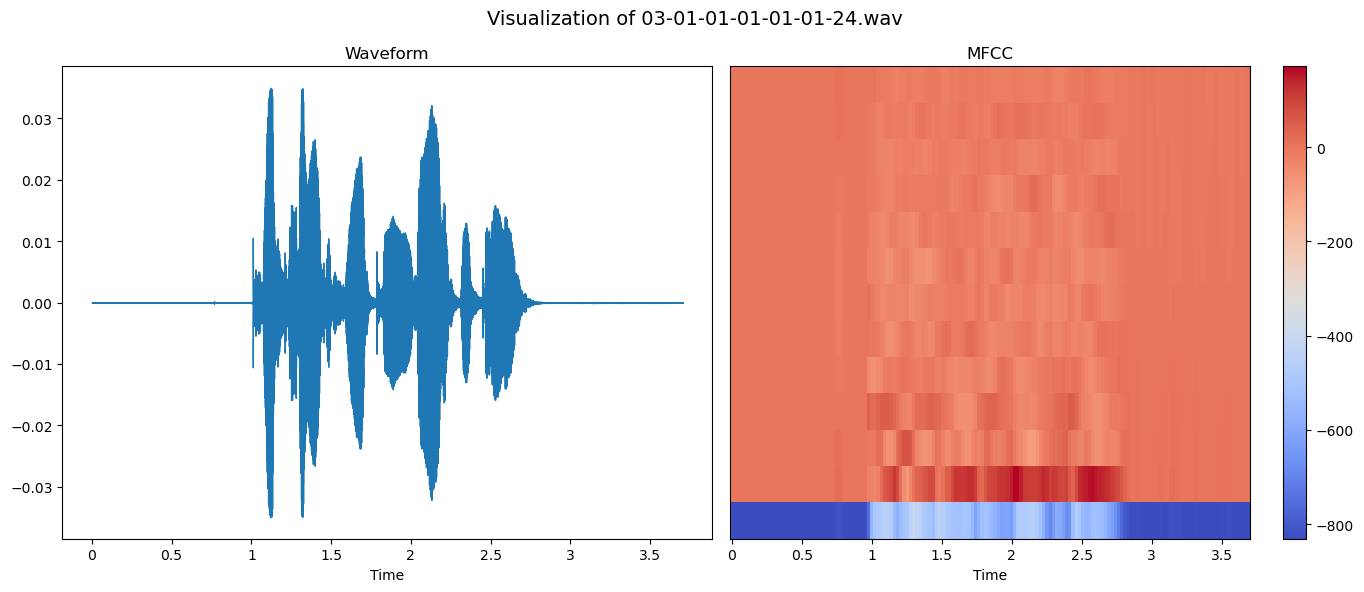

In [39]:
# Automatically pick a .wav file
wav_files = glob.glob(data_path + r"\*.wav")

if not wav_files:
    print(" No .wav files found.")
else:
    test_audio_path = wav_files[0]
    print(f" Testing on file: {test_audio_path}")
    predict_emotion(test_audio_path, model)
